In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
dengue = pd.read_csv('dengue.csv')

In [47]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [48]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [49]:
dengue['Month'] =  dengue['Month'].astype('category')
dengue['Year'] =  dengue['Year'].astype('category')
dengue['Region'] =  dengue['Region'].astype('category')

In [50]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


In [51]:
dengue


,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [52]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month, ordered=True)


<h1>INSIGHT NO. 1</h1>

<h3>Although August has the highest cases of Dengue, October seems to have the highest death.</h3>

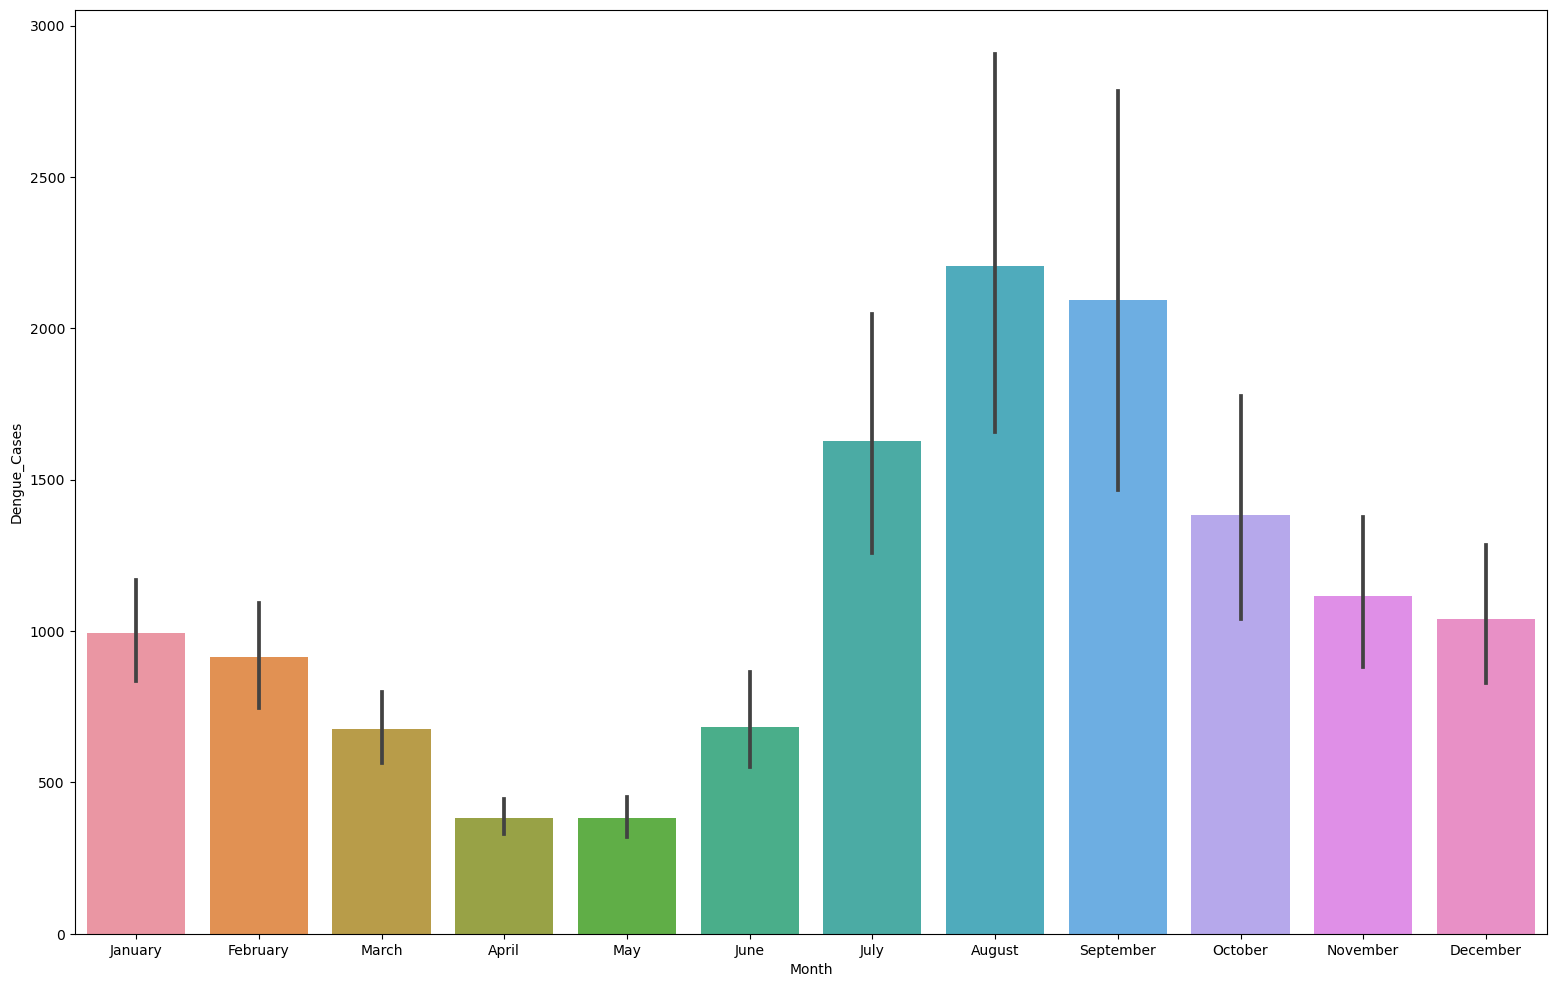

In [53]:
sns.barplot(data=dengue, x='Month', y='Dengue_Cases')
plt.gcf().set_size_inches(19, 12)
plt.show()

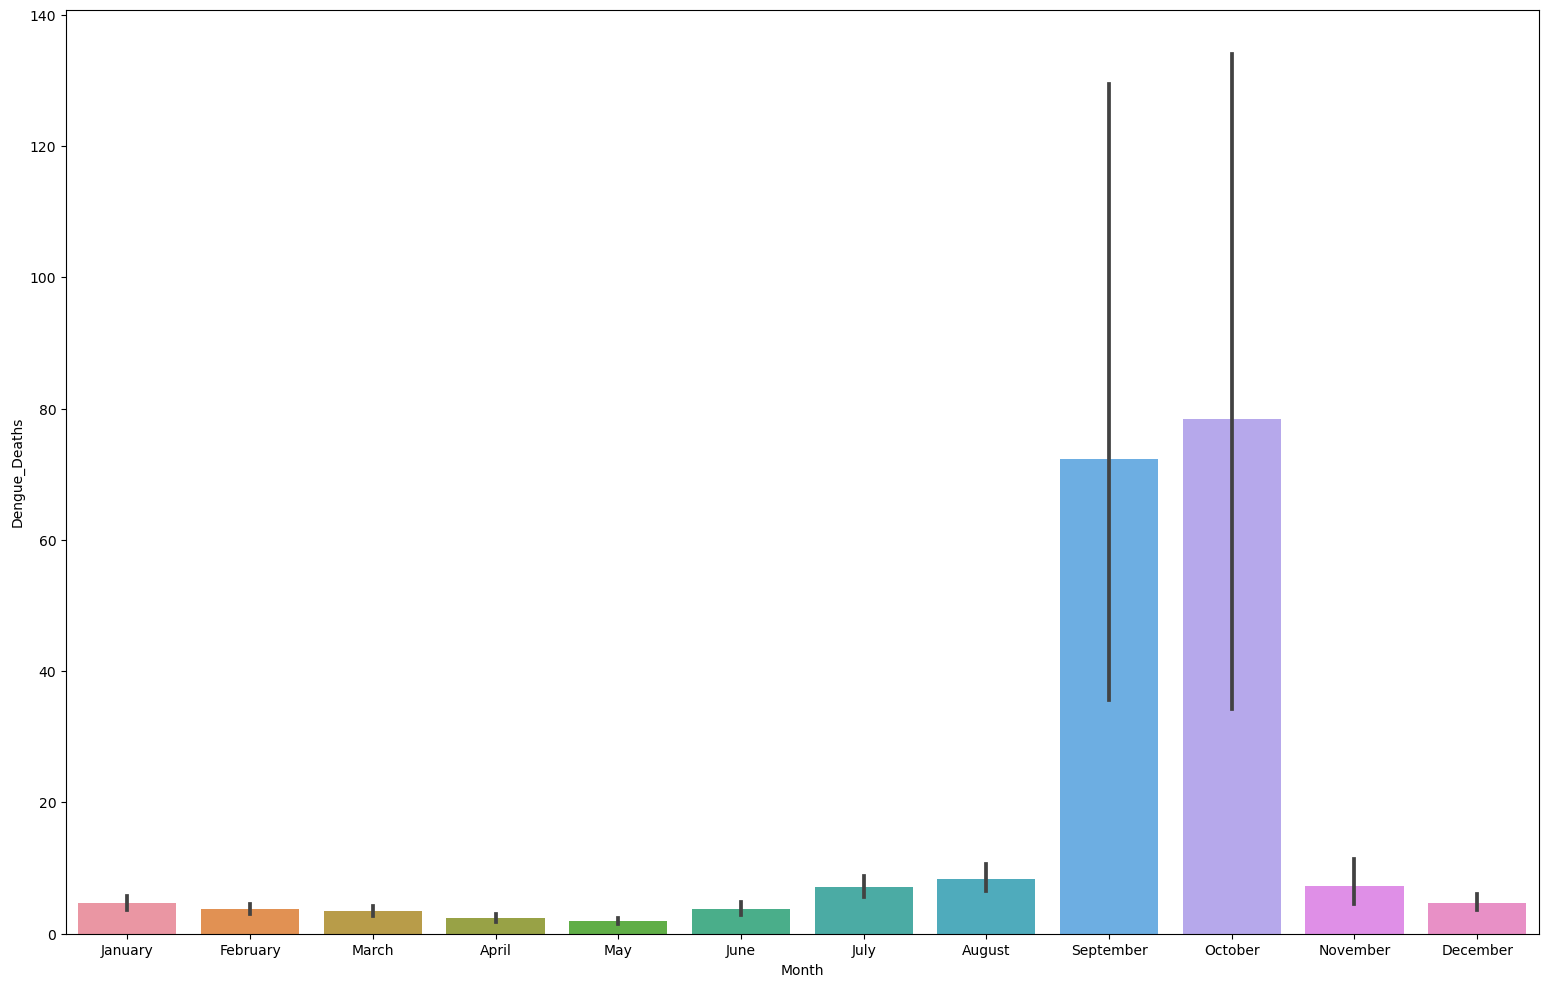

In [54]:
sns.barplot(data=dengue, x='Month', y='Dengue_Deaths')
plt.gcf().set_size_inches(19, 12)
plt.show()

<h1>INSIGHT NO. 2</h1>

<h3>August and September have the highest average dengue cases, with 2206.52 and 2093.45 cases respectively. This suggests that dengue outbreaks are most severe during the rainy season, likely due to favorable conditions for mosquito breeding.</h3>

In [55]:
avg_month = dengue.groupby("Month")["Dengue_Cases"].mean()
round_avg = np.round(avg_month, 2)

In [56]:
round_avg

Month
January       992.09
February      915.31
March         677.36
April         382.45
May           381.02
June          683.65
July         1626.38
August       2206.52
September    2093.45
October      1384.06
November     1116.47
December     1040.36
Name: Dengue_Cases, dtype: float64

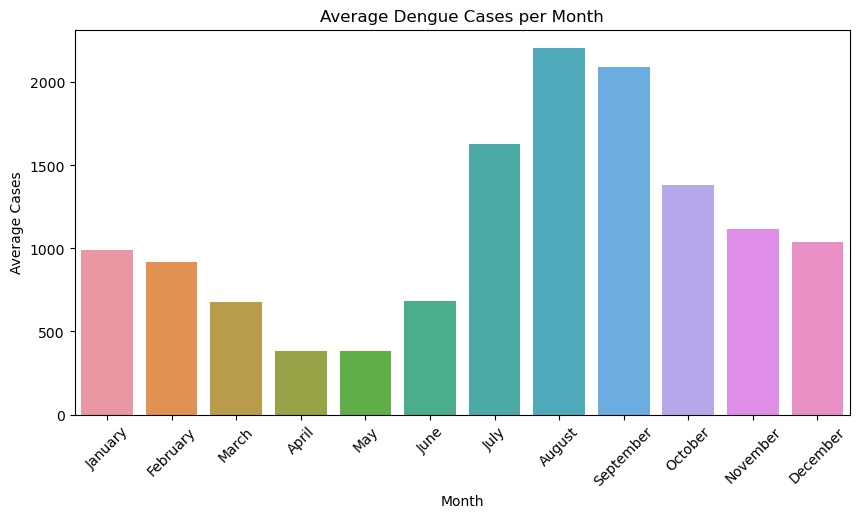

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x=round_avg.index, y=round_avg.values)
plt.title("Average Dengue Cases per Month")
plt.xticks(rotation=45)
plt.ylabel("Average Cases")
plt.show()

<h1>INSIGHT NO. 3</h1>

<h3>October and September have the highest average number of dengue deaths, with 78.47 and 72.33 deaths respectively. This corresponds with the peak in dengue cases observed during the rainy season, particularly in August and September, indicating that while the number of cases increases, the severity of the outbreaks also leads to higher fatalities.</h3>

In [58]:
avg_month_death = dengue.groupby("Month")["Dengue_Deaths"].mean()
round_avg_death = np.round(avg_month_death, 2)

In [59]:
round_avg_death

Month
January       4.64
February      3.71
March         3.42
April         2.35
May           1.91
June          3.79
July          7.19
August        8.40
September    72.33
October      78.47
November      7.21
December      4.75
Name: Dengue_Deaths, dtype: float64

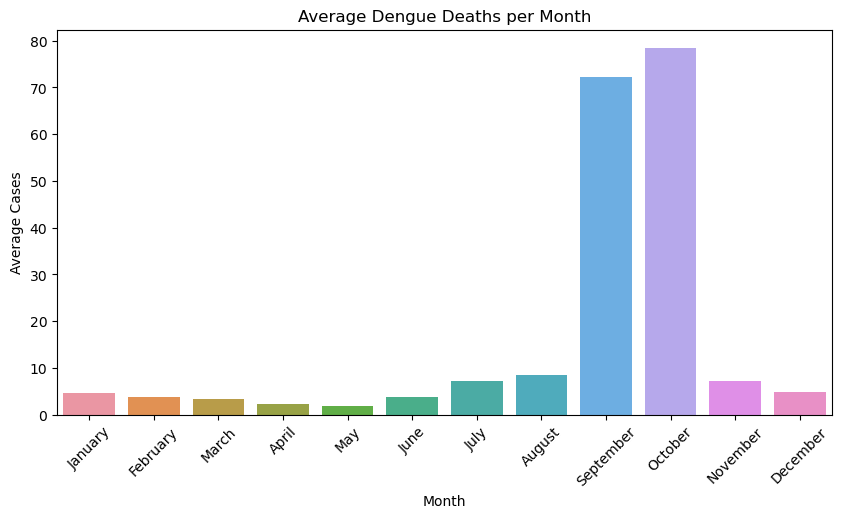

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x=round_avg_death.index, y=round_avg_death.values)
plt.title("Average Dengue Deaths per Month")
plt.xticks(rotation=45)
plt.ylabel("Average Cases")
plt.show()

<h1>INSIGHT NO. 4</h1>

<h3>In 2019, the number of dengue cases peaked at 441,902, marking a major outbreak. This sharp increase suggests a significant rise in transmission rates, which requires attention to healthcare responses and prevention efforts during such periods.</h3>

In [61]:
total_cases_year = dengue.groupby("Year")["Dengue_Cases"].sum()
total_cases_year

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

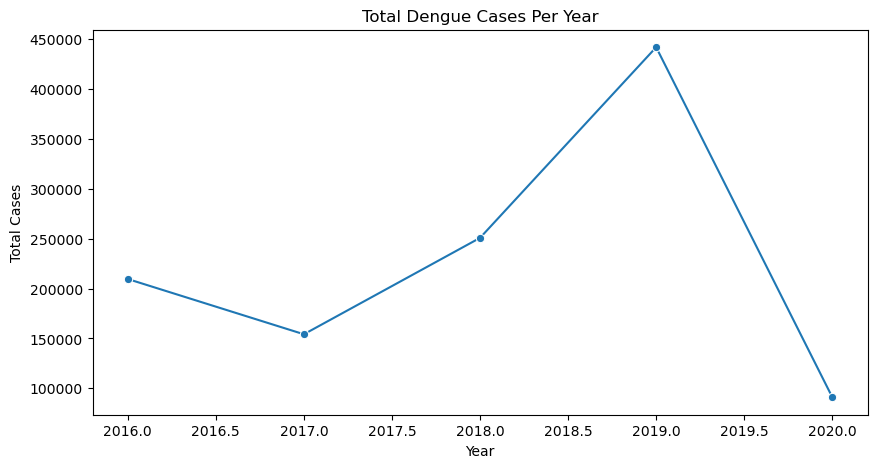

In [62]:
plt.figure(figsize=(10,5))
sns.lineplot(x=total_cases_year.index, y=total_cases_year.values, marker="o")
plt.title("Total Dengue Cases Per Year")
plt.ylabel("Total Cases")
plt.show()

<h1>INSIGHT NO. 5</h1>

<h3>In 2016, dengue deaths peaked, but in the succeeding years, the number of deaths significantly declined. Despite a surge in cases in 2019, the death toll remained relatively low compared to 2016, indicating an improvement in dengue case management over time.</h3>

In [63]:
total_deaths_year = dengue.groupby("Year")["Dengue_Deaths"].sum()
total_deaths_year

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64

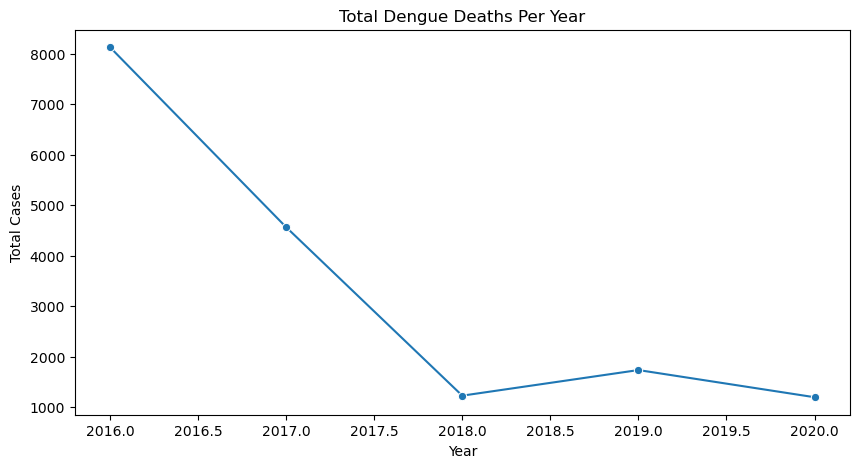

In [64]:
plt.figure(figsize=(10,5))
sns.lineplot(x=total_deaths_year.index, y=total_deaths_year.values, marker="o")
plt.title("Total Dengue Deaths Per Year")
plt.ylabel("Total Cases")
plt.show()

<h1>INSIGHT NO. 6</h1>

<h3>Region IV-A is experiencing a significantly higher burden of dengue compared to other regions, indicating a need for focused public health interventions.</h3>

In [65]:
total_cases_region = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)
total_cases_region


Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Region X        82437
Region XII      59802
Region I        59066
Region VIII     51983
Region IX       47781
Region II       45141
Region XIII     35293
Region XI       32522
Region IV-B     30849
CAR             30582
Region V        22167
BARMM           11537
Name: Dengue_Cases, dtype: int64

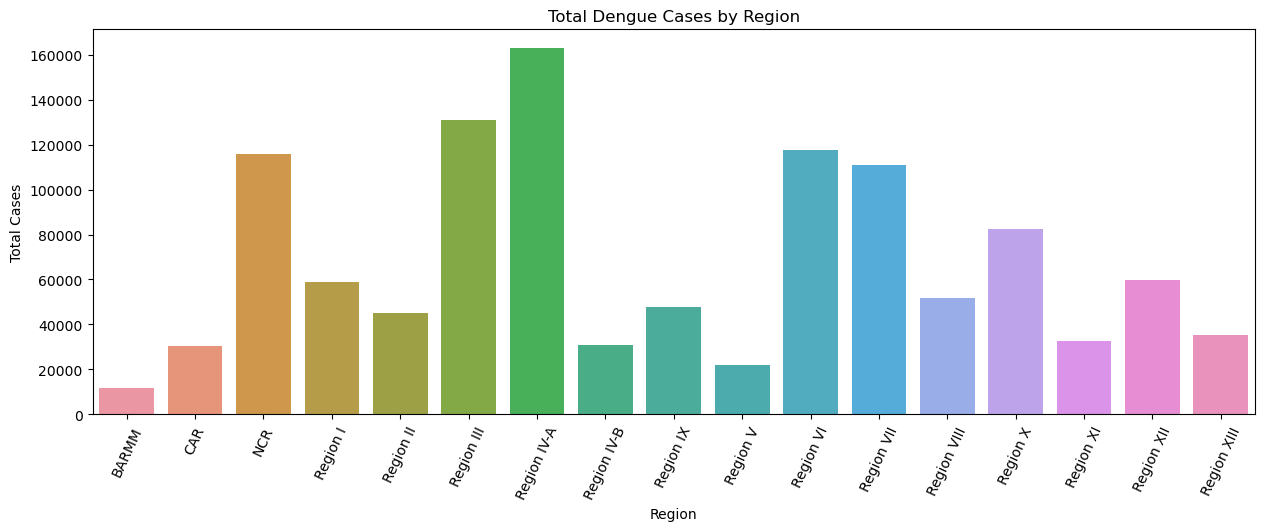

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(x=total_cases_region.index, y=total_cases_region.values)
plt.xticks(rotation=65)
plt.title("Total Dengue Cases by Region")
plt.ylabel("Total Cases")
plt.show()

<h1>INSIGHT NO. 7</h1>

<h3>Although Region IV-A has the highest cases of dengue, it is evident that regions such as Region XII, IV-B, NCR,, and CAR requires urgent attention due to high mortality rate.</h3>

In [67]:
total_deaths_region = dengue.groupby("Region")["Dengue_Deaths"].sum().sort_values(ascending=False)
total_deaths_region


Region
NCR            4008
Region XII     2796
Region VI      1825
Region VII     1760
CAR            1008
Region XIII     966
Region X        848
Region IV-A     652
Region VIII     585
Region IX       532
Region III      482
Region XI       385
BARMM           332
Region II       193
Region V        185
Region I        157
Region IV-B     130
Name: Dengue_Deaths, dtype: int64

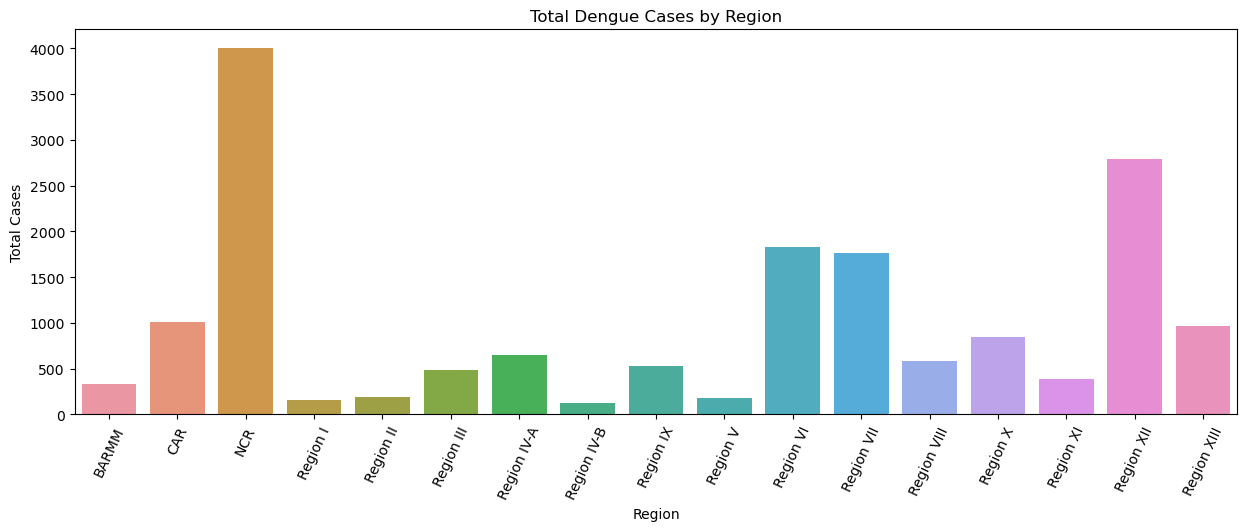

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x=total_deaths_region.index, y=total_deaths_region.values)
plt.xticks(rotation=65)
plt.title("Total Dengue Cases by Region")
plt.ylabel("Total Cases")
plt.show()

<h1>INSIGHT NO. 8</h1>

<h3>The 1.47% case fatality rate means that 1.47% of individuals who contract dengue in the country die from it. While this is relatively low, it still suggests that dengue remains a significant health threat and emphasizes the importance of ongoing preventive measures and prompt medical intervention.</h3>

In [69]:
total_cases = dengue["Dengue_Cases"].sum()
total_deaths = dengue["Dengue_Deaths"].sum()
national_fatality_rate = total_deaths / total_cases
print("\nNational Case Fatality Rate:", round(national_fatality_rate, 4))

labels = ['Recovered/Survived', 'Deaths']
sizes = [total_cases - total_deaths, total_deaths]
colors = ['#66b3ff', '#ff6666']



National Case Fatality Rate: 0.0147


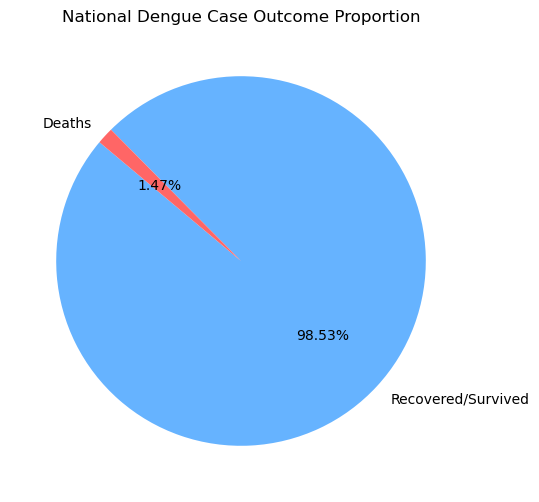

In [70]:
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('National Dengue Case Outcome Proportion')
plt.show()

<h1>INSIGHT NO. 9</h1>

<h3>The high fatality rate of 5.67% in October indicates that during this month, a significantly higher proportion of individuals who contracted dengue succumbed to the disease. This could point to either a more severe outbreak, challenges in timely healthcare intervention, or other factors that make dengue cases particularly dangerous during this period.</h3>

In [71]:
dengue_grouped = dengue.groupby("Month").sum()
dengue_grouped["Monthly_Fatality"] = dengue_grouped["Dengue_Deaths"] / dengue_grouped["Dengue_Cases"]
print("\nMonth with highest fatality rate:")
print(dengue_grouped.sort_values("Monthly_Fatality", ascending=False)[["Monthly_Fatality"]].head(5))


Month with highest fatality rate:
           Monthly_Fatality
Month                      
October            0.056696
September          0.034550
November           0.006459
April              0.006152
June               0.005541


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

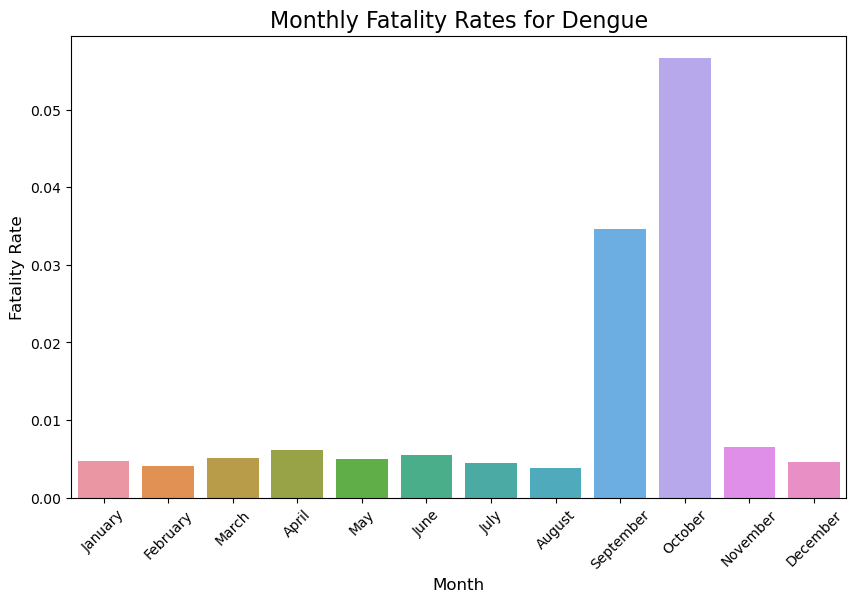

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dengue_grouped.index, y=dengue_grouped["Monthly_Fatality"])
plt.title("Monthly Fatality Rates for Dengue", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Fatality Rate", fontsize=12)
plt.xticks(rotation=45)

<h1>INSIGHT NO. 10</h1>

<h3>In 2016, NCR (National Capital Region) experienced the highest total number of dengue deaths, contributing significantly to the overall fatalities that year, with 2987 deaths recorded. This suggests that 2016 was a particularly severe year for dengue in NCR, highlighting the region's vulnerability to large-scale outbreaks.</h3>

In [73]:
region_year_deaths = dengue.groupby(["Region", "Year"])["Dengue_Deaths"].sum().reset_index()
highest_deaths = region_year_deaths.sort_values("Dengue_Deaths", ascending=False).head(5)
print("\nRegion-Year with highest total deaths:")
print(highest_deaths)

highest_deaths["Region_Year"] = highest_deaths["Region"].astype(str) + " - " + highest_deaths["Year"].astype(str)




Region-Year with highest total deaths:
        Region  Year  Dengue_Deaths
10         NCR  2016           2987
75  Region XII  2016           2369
51   Region VI  2017           1380
56  Region VII  2017           1189
5          CAR  2016            888


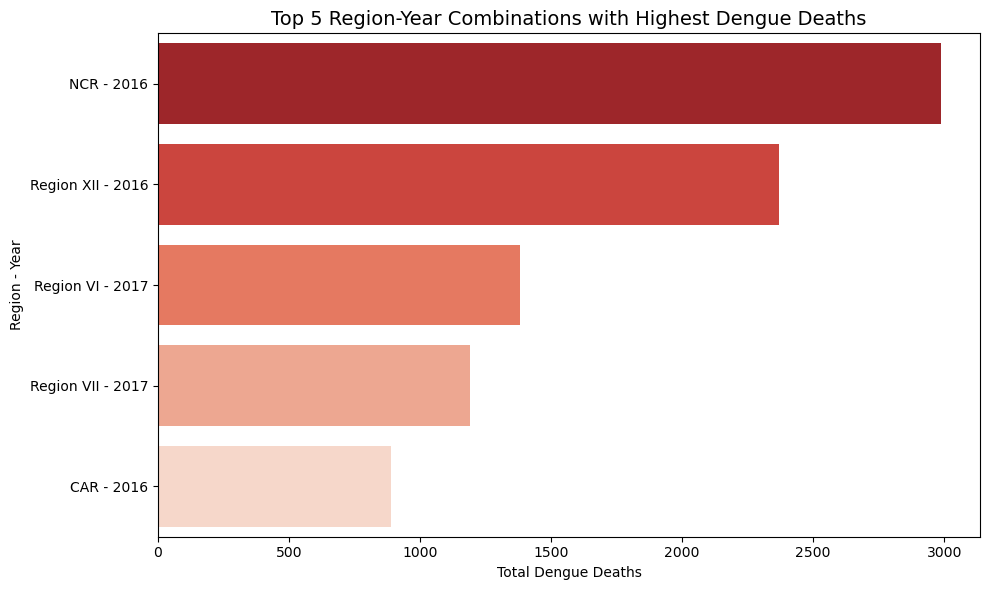

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(y="Region_Year", x="Dengue_Deaths", data=highest_deaths, palette="Reds_r")

plt.title("Top 5 Region-Year Combinations with Highest Dengue Deaths", fontsize=14)
plt.xlabel("Total Dengue Deaths")
plt.ylabel("Region - Year")
plt.tight_layout()
plt.show()

<h1>INSIGHT NO. 11</h1>

<h3>Certain months, especially in October, had unusually high dengue fatality rates despite fewer cases, indicating delayed treatment or overburdened healthcare systems. Regions like Region XIII (2016) and NCR (2020) need better early detection and healthcare preparedness to reduce deaths during outbreaks.</h3>

In [75]:
dengue["Death_Rate"] = dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]
high_death_months = dengue[dengue["Dengue_Cases"] < dengue["Dengue_Cases"].median()].sort_values("Death_Rate", ascending=False).head()
print("\nMonths with high deaths despite fewer cases:")
print(high_death_months[["Year", "Month", "Region", "Dengue_Cases", "Dengue_Deaths", "Death_Rate"]])


Months with high deaths despite fewer cases:
     Year    Month       Region  Dengue_Cases  Dengue_Deaths  Death_Rate
789  2016  October  Region XIII           277            481    1.736462
501  2017  October  Region VIII           144            236    1.638889
561  2017  October    Region IX           108            176    1.629630
897  2020  October          NCR           129            185    1.434109
837  2020  October  Region XIII            10             14    1.400000


Text(0, 0.5, 'Death Rate')

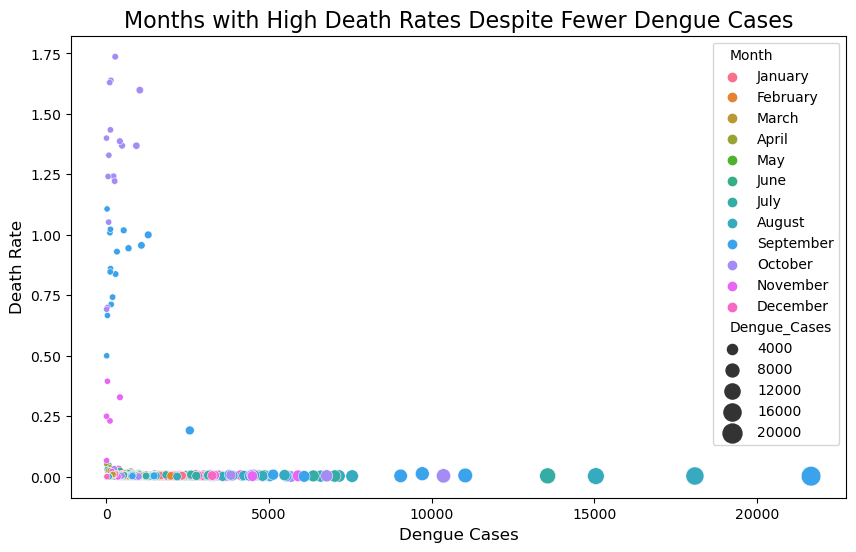

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Death_Rate"], hue=dengue["Month"], size=dengue["Dengue_Cases"], sizes=(20, 200))
plt.title("Months with High Death Rates Despite Fewer Dengue Cases", fontsize=16)
plt.xlabel("Dengue Cases", fontsize=12)
plt.ylabel("Death Rate", fontsize=12)

<h1>INSIGHT NO. 12</h1>

<h3>The months of September and October in 2016 and 2017 recorded the highest number of dengue deaths and death rates, indicating these periods were particularly critical. Despite a large number of cases in September 2019, the death rate was significantly lower, suggesting improved response or management that year.</h3>

In [77]:
dengue_sum = dengue.groupby(["Year", "Month"]).sum().reset_index()
worst_month = dengue_sum.sort_values("Dengue_Deaths", ascending=False).head(5)
print("\nWorst month-year combo by deaths:")
print(worst_month)


Worst month-year combo by deaths:
    Year      Month  Dengue_Cases  Dengue_Deaths  Death_Rate
9   2016    October         21943           3954    7.327206
8   2016  September         26990           3418    4.829985
21  2017    October         15259           2098    8.577899
20  2017  September         17753           1826    4.519928
44  2019  September         89642            377    0.070274


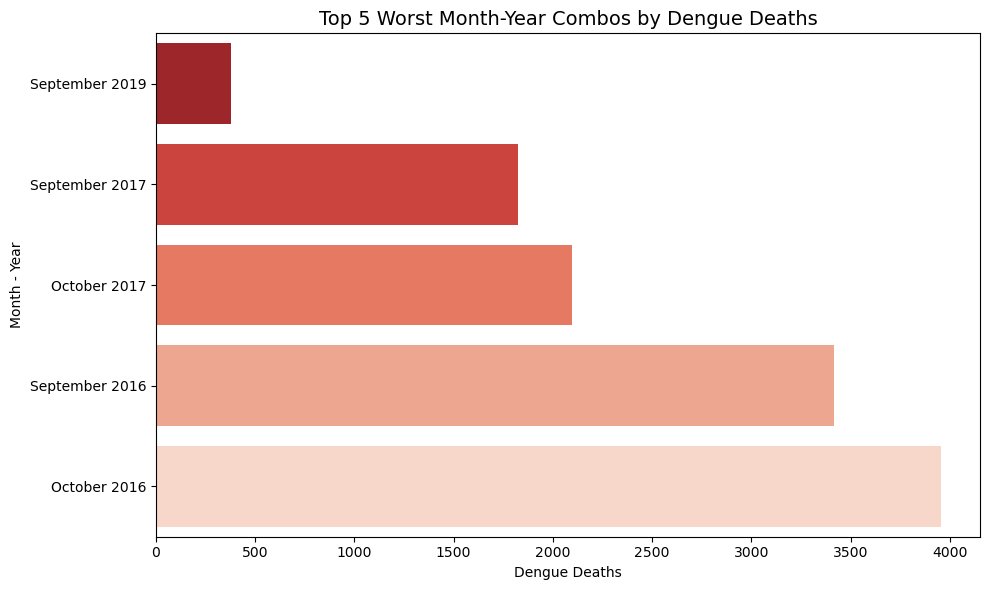

In [78]:
worst_month["Month_Year"] = worst_month["Month"].astype(str) + " " + worst_month["Year"].astype(str)

worst_month = worst_month.sort_values("Dengue_Deaths", ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Dengue_Deaths", y="Month_Year", data=worst_month, palette="Reds_r")

plt.title("Top 5 Worst Month-Year Combos by Dengue Deaths", fontsize=14)
plt.xlabel("Dengue Deaths")
plt.ylabel("Month - Year")
plt.tight_layout()
plt.show()

<h1>INSIGHT NO. 13</h1>

<h3>Regions such as BARMM, Region V, CAR, Region IV-B, and Region XI consistently reported the lowest average number of dengue cases, suggesting these areas had fewer cases across the observed years.</h3>

In [79]:
mean_cases = dengue.groupby("Region")["Dengue_Cases"].mean()
print("\nRegions with lowest average cases:")
lowest_avg_cases = mean_cases.sort_values().head(5).reset_index()
lowest_avg_cases.columns = ["Region", "Dengue_Cases"]
print(lowest_avg_cases)


Regions with lowest average cases:
        Region  Dengue_Cases
0        BARMM    192.283333
1     Region V    369.450000
2          CAR    509.700000
3  Region IV-B    514.150000
4    Region XI    542.033333


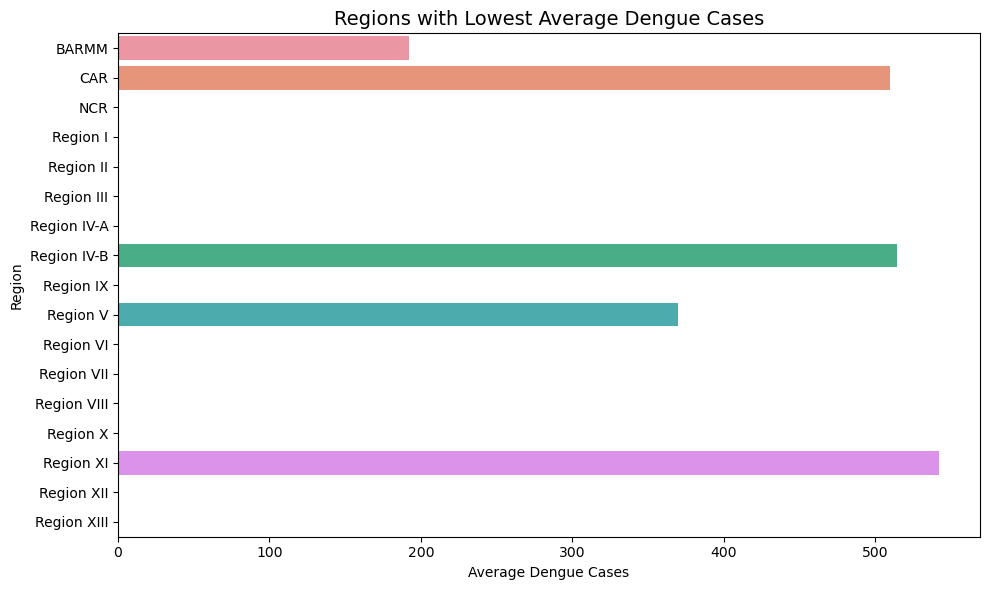

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Dengue_Cases", y="Region", data=lowest_avg_cases)

plt.title("Regions with Lowest Average Dengue Cases", fontsize=14)
plt.xlabel("Average Dengue Cases")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

<h1>INSIGHT NO. 14</h1>

<h3>These top 3 regions(Region IV-A, NCR, and Region III) alone account for a significant portion of all dengue cases in the country, indicating they may be high-risk or densely populated areas.</h3>

In [108]:
top_regions = total_cases_region.head(3).index
df_top = dengue[dengue["Region"].isin(top_regions)]
df_top


,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Death_Rate
120,January,2016,Region III,1976,3,0.001518
121,February,2016,Region III,1748,5,0.002860
122,March,2016,Region III,883,3,0.003398
123,April,2016,Region III,549,0,0.000000
124,May,2016,Region III,365,0,0.000000
...,...,...,...,...,...,...
415,August,2020,Region VI,473,4,0.008457
416,September,2020,Region VI,169,2,0.011834
417,October,2020,Region VI,115,1,0.008696
418,November,2020,Region VI,197,2,0.010152


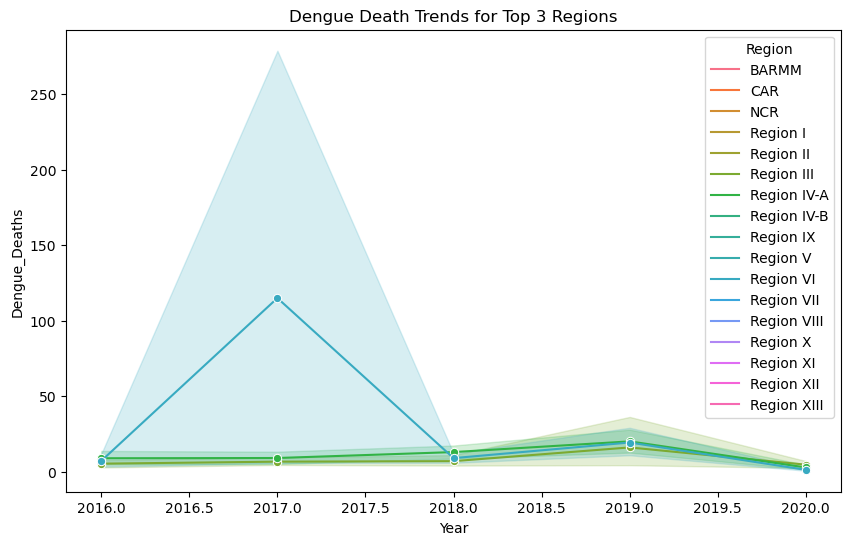

In [109]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_top, x="Year", y="Dengue_Deaths", hue="Region", marker="o")
plt.title("Dengue Death Trends for Top 3 Regions")
plt.show()

<h1>INSIGHT NO. 15</h1>

<h3>The overall total number of dengue cases is approximately 1,147,425, with 2019 contributing the highest number of cases.</h3>

In [110]:
total_cases = dengue['Dengue_Cases'].sum()
total_cases


1147425

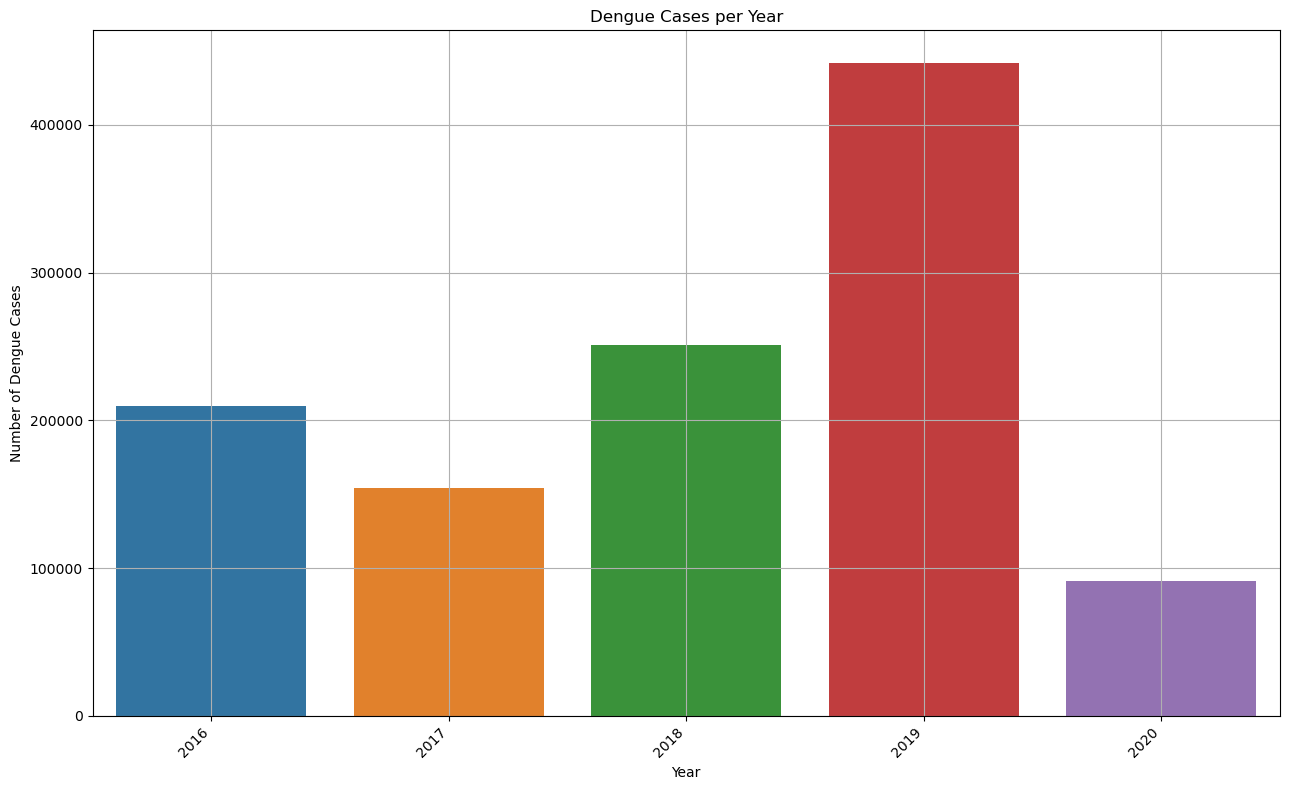

In [111]:
cases_year = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

sns.barplot(data = cases_per_year, x='Year', y='Dengue_Cases')
plt.gcf().set_size_inches(13,8)
plt.title('Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>INSIGHT NO. 16</h1>

<h3>The overall total number of dengue deaths is approximately 16,844 with 2016 contributing the highest number of cases.</h3>

In [112]:
total_deaths = dengue['Dengue_Deaths'].sum()
total_deaths

16844

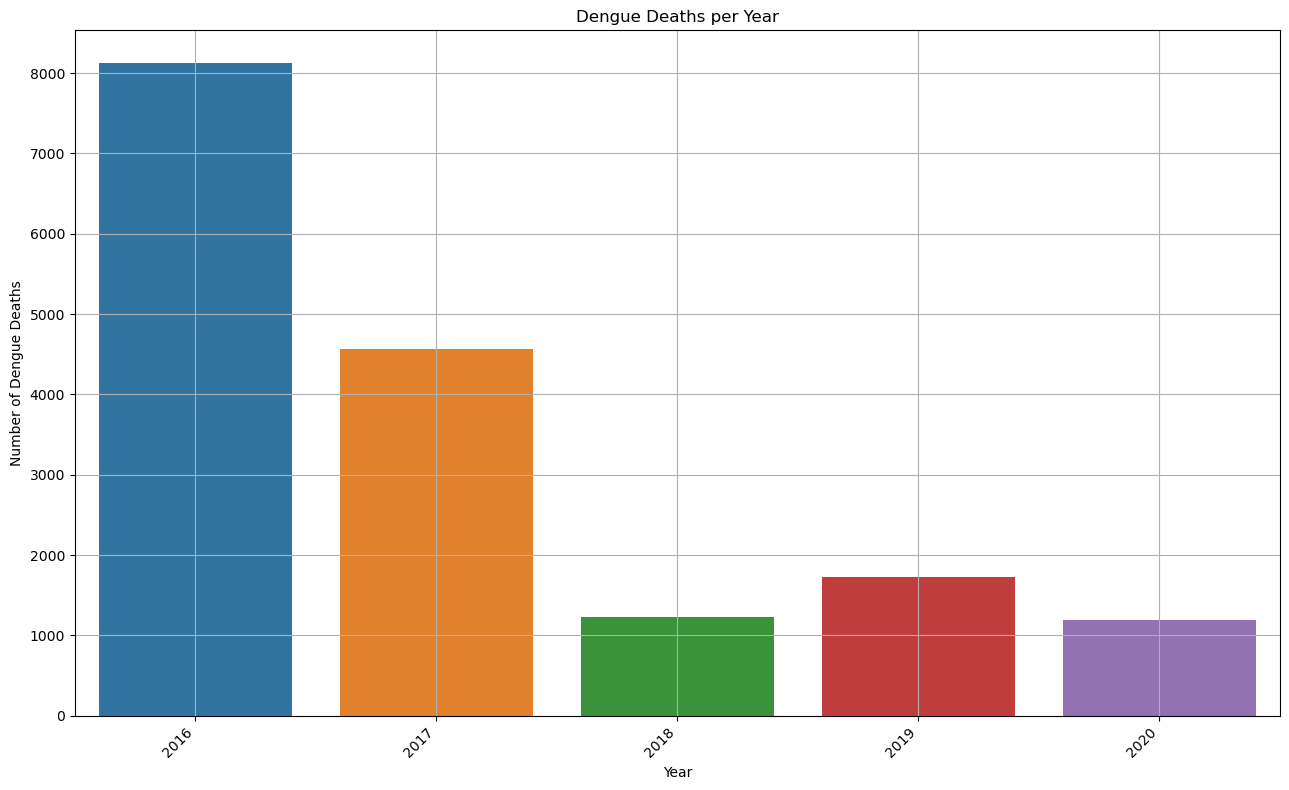

In [105]:
deaths_year = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()

sns.barplot(data = deaths_year, x='Year', y='Dengue_Deaths')
plt.gcf().set_size_inches(13,8)
plt.title('Dengue Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Deaths')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>INSIGHT NO. 17</h1>

<h3>There is a weak or non-linear relationship between dengue cases and dengue deaths.
High numbers of cases do not necessarily lead to high numbers of deaths.</h3>

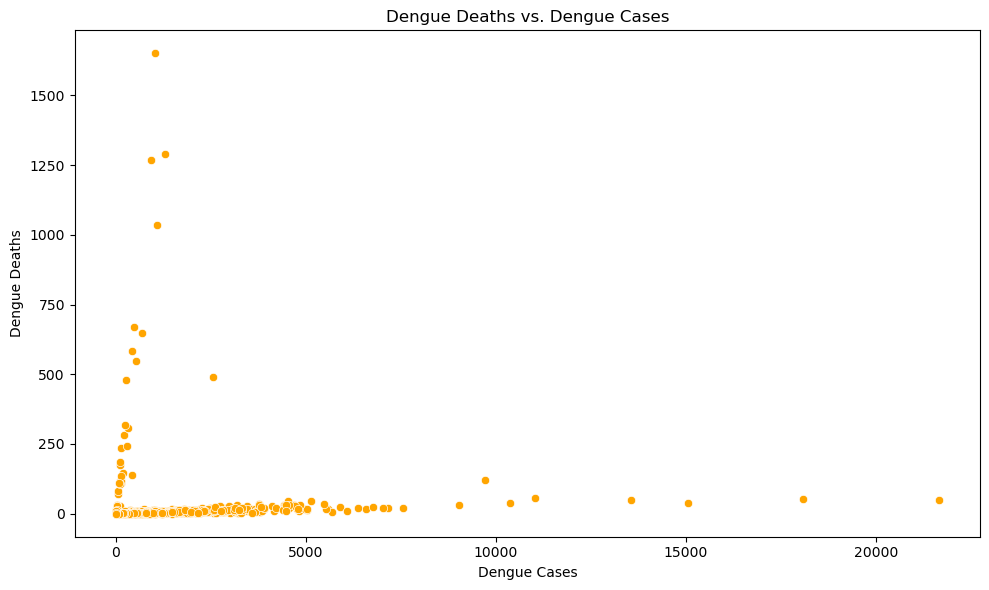

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dengue_Cases', y='Dengue_Deaths', data=dengue, color='orange')
plt.title('Dengue Deaths vs. Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.tight_layout()
plt.show()

<h1>INSIGHT NO. 18</h1>

<h3>The violin plot shows that dengue cases are most prevalent in certain regions, with a wider distribution in those areas. Some regions have a more concentrated spread of cases.</h3>

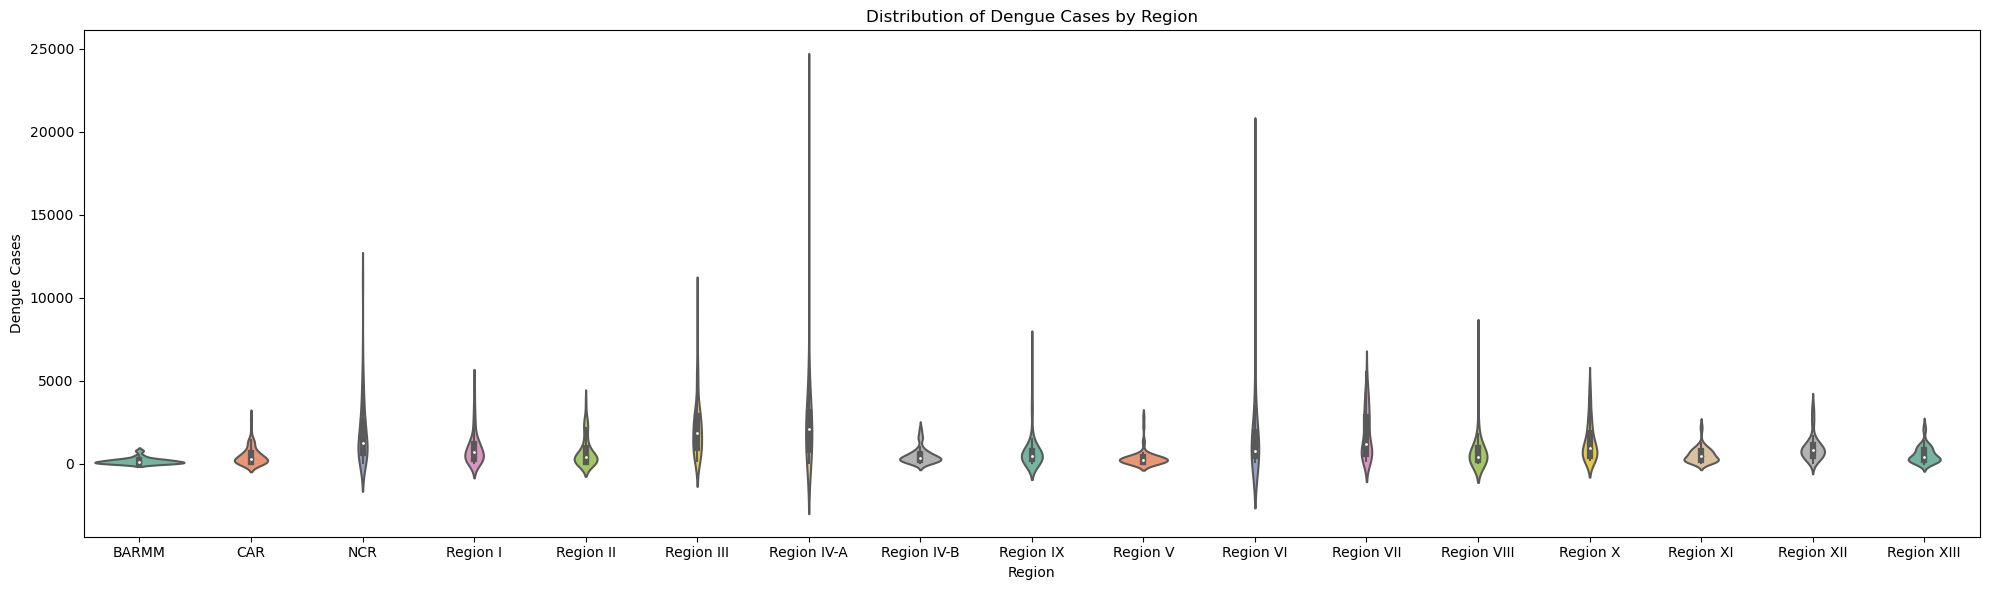

In [117]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Region', y='Dengue_Cases', data=dengue, palette="Set2")
plt.title('Distribution of Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.tight_layout()
plt.show()


<h1>INSIGHT NO. 19</h1>

<h3>The histogram of dengue-related deaths reveals that most records report zero or one death, with a rapid decline in frequency as the death count increases. This suggests that while dengue deaths are relatively uncommon, they do occur, possibly due to severe cases or underreporting in less severe situations.</h3>

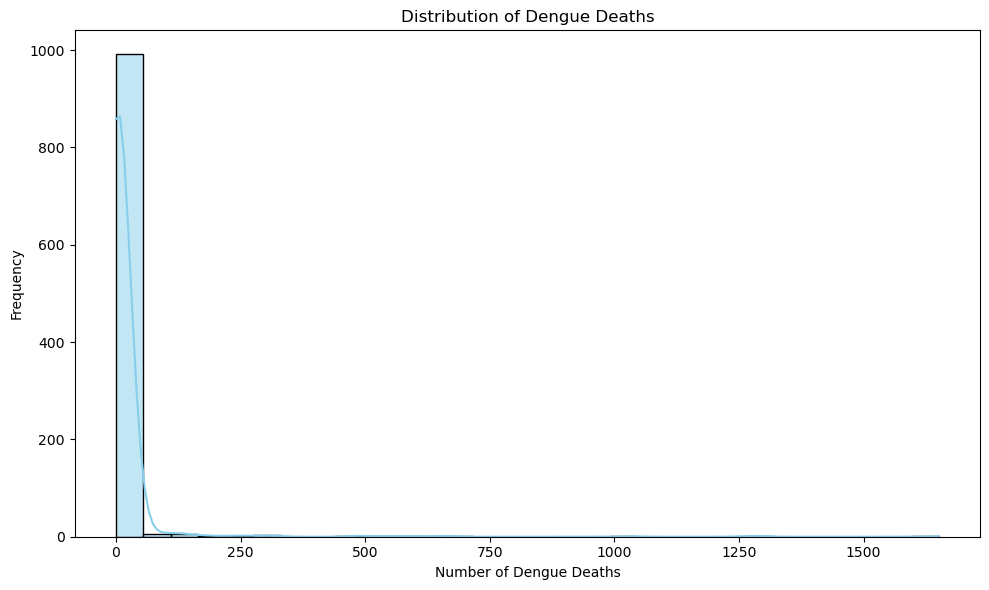

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(dengue['Dengue_Deaths'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Dengue Deaths')
plt.xlabel('Number of Dengue Deaths')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<h1>INSIGHT NO. 20</h1>

<h3>The boxplot for dengue cases by year demonstrates that while most years have a relatively similar distribution of cases, some years experience higher peaks, indicating potential outbreaks or seasonal variations. This variability could be linked to climate, regional health interventions, or population susceptibility.</h3>

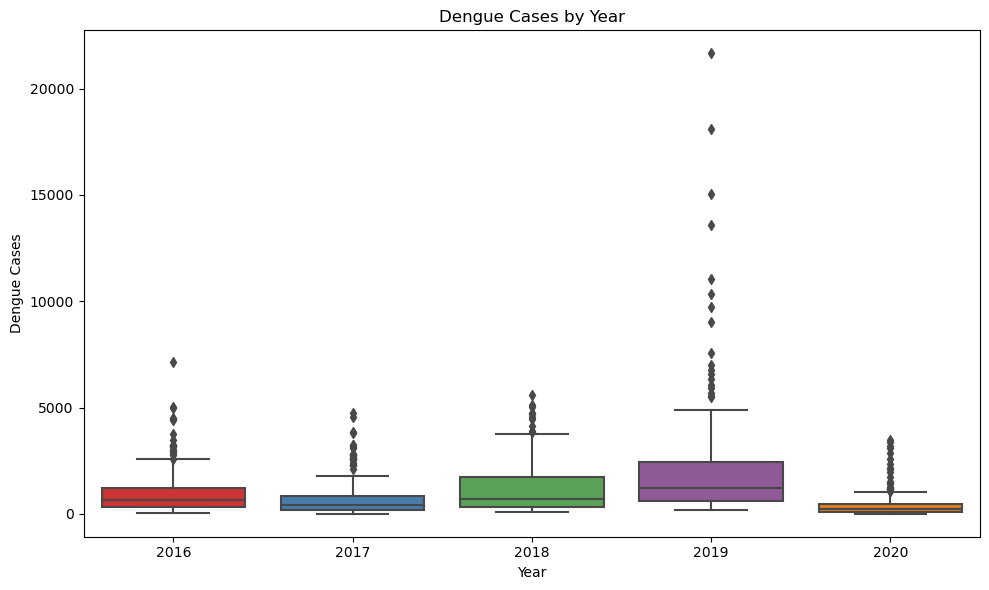

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Dengue_Cases', data=dengue, palette="Set1")
plt.title('Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.tight_layout()
plt.show()